In [1]:
# import all the necessary libraries
from  synthetic_data.data import SyntheticData
from  synthetic_data.cluster_size import *
from  synthetic_data.outlier import *
from  synthetic_data.cluster_label import *
from  synthetic_data.regression_params import *
from  synthetic_data.target import *

from evaluation.utils import Utils
from evaluation.eval import Evaluation
from evaluation.visual import Visualization
from scripts.model import LpcNsMip, LpcNsQbpo, GobalOpt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

#auto reload
%load_ext autoreload
%autoreload 2

## RQ1 Time vs. Error Scalability Analysis

How do objective error and optimization times change as the number of samples increases? 

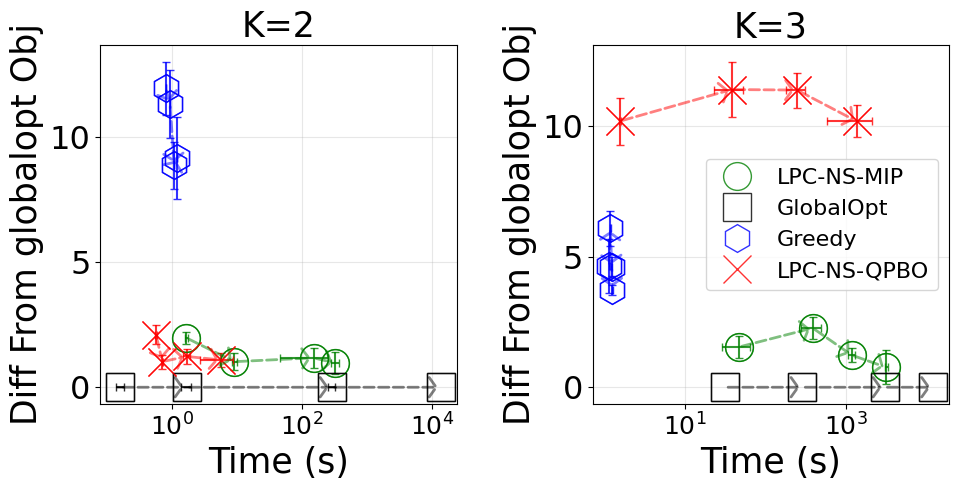

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

dir = 'N/K=2_D=2_noise_std=3.5_outlier_ratio=0.0_validation=False_use_exist=False_SelfDefinedX_SelfDefinedSlope'
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', 
                                           optimal_folder_path=f'experiments/results/globalopt/{dir}')
lpc_ns_qpbo = Utils.load_evaluation_result(f'experiments/results/lpc_ns_qpbo/{dir}', 
                                           optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}',
                                         optimal_folder_path=f'experiments/results/globalopt/{dir}')

fig, axes[0] = Visualization.plot_trade_off(fig, axes[0], 'N', 
                                        lpc_ns_mip = lpc_ns_mip[0], 
                                        lpc_ns_qpbo = lpc_ns_qpbo[0], 
                                        globalopt = globalopt[0],
                                        x_axis = 'time',
                                        subset=['lpc_ns_mip_refit_milp_assignment',
                                                'lpc_ns_qpbo_refit_milp_assignment',
                                                'lpc_ns_qpbo_greedy',
                                                'globalopt_milp'
                                                ],
                                        list_of_parameters=[50, 100, 150, 200],
                                        legend=False)
axes[0].set_title('K=2', fontsize=25)

dir = 'N/K=3_D=2_noise_std=3.5_outlier_ratio=0.0_validation=False_use_exist=False_SelfDefinedX_SelfDefinedSlope'
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', 
                                          optimal_folder_path=f'experiments/results/globalopt/{dir}')
lpc_ns_qpbo = Utils.load_evaluation_result(f'experiments/results/lpc_ns_qpbo/{dir}', 
                                           optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}', 
                                         optimal_folder_path=f'experiments/results/globalopt/{dir}')


fig, axes[1] = Visualization.plot_trade_off(fig, axes[1], 'N', 
                                        lpc_ns_mip = lpc_ns_mip[0], 
                                        lpc_ns_qpbo = lpc_ns_qpbo[0], 
                                        globalopt = globalopt[0],
                                        x_axis = 'time',
                                        subset=['lpc_ns_mip_refit_milp_assignment',
                                                'lpc_ns_qpbo_refit_milp_assignment',
                                                'lpc_ns_qpbo_greedy',
                                                'globalopt_milp'
                                                ],
                                        list_of_parameters= [45, 60, 75, 90])
axes[1].set_title('K=3', fontsize=25)
plt.tight_layout()
plt.show()

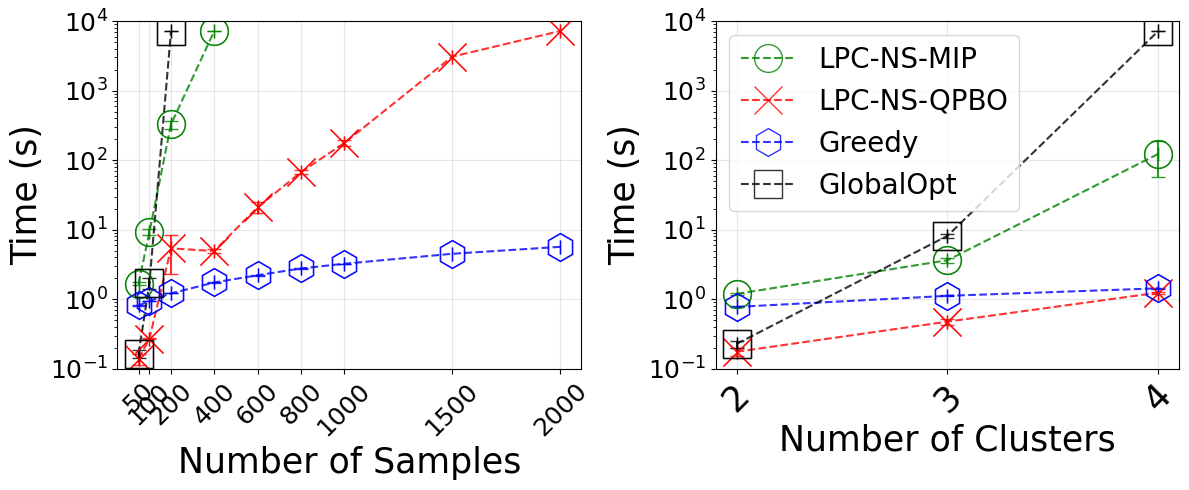

In [3]:

fig, axes = plt.subplots(1, 2, figsize=(12,5))

dir = 'K/N=36_D=2_noise_std=3.5_outlier_ratio=0.0_validation=False_use_exist=False_SelfDefinedX_SelfDefinedSlope'
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
lpc_ns_qpbo = Utils.load_evaluation_result(f'experiments/results/lpc_ns_qpbo/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')

fig, axes[1] = Visualization.plot_time_vs_n('K', lpc_ns_mip[0], lpc_ns_qpbo[0], globalopt[0],
                                         list_of_plot_parameters=[2,3,4], legend=True, fig=fig, ax=axes[1])

dir = 'N/K=2_D=2_noise_std=3.5_outlier_ratio=0.0_validation=False_use_exist=False_SelfDefinedX_SelfDefinedSlope'
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', 
                                           optimal_folder_path=f'experiments/results/globalopt/{dir}')
lpc_ns_qpbo = Utils.load_evaluation_result(f'experiments/results/lpc_ns_qpbo/{dir}', 
                                           optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}',
                                         optimal_folder_path=f'experiments/results/globalopt/{dir}')
fig, axes[0] = Visualization.plot_time_vs_n('N', lpc_ns_mip[0], lpc_ns_qpbo[0], globalopt[0], 
                        list_of_plot_parameters=[50, 100, 200, 400, 600, 800, 1000, 1500, 2000], fig=fig, ax=axes[0])



axes[0].set_xticks([50, 100, 200, 400, 600, 800, 1000, 1500, 2000])
#rotate x-axis labels
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)
axes[1].tick_params(axis='x', labelsize=25)
axes[1].tick_params(axis='y', labelsize=18)
plt.tight_layout()
plt.show()

## RQ2: Performance Analysis and Algorithm Properties on Synthetic Dataset

For synthetic datasets with known ground truth, how do GlobalOpt, Greedy, LPC-NS-MIP, and LPC-NS-QPBO compare in terms of objective and accuracy? We evaluate these metrics across different clustering settings ($K$) while varying the dimensionality of feature variables, noise levels, and the proportion of outliers in the target variable.  

### Varying standard deviation of gaussian noise in target variable

K = 2

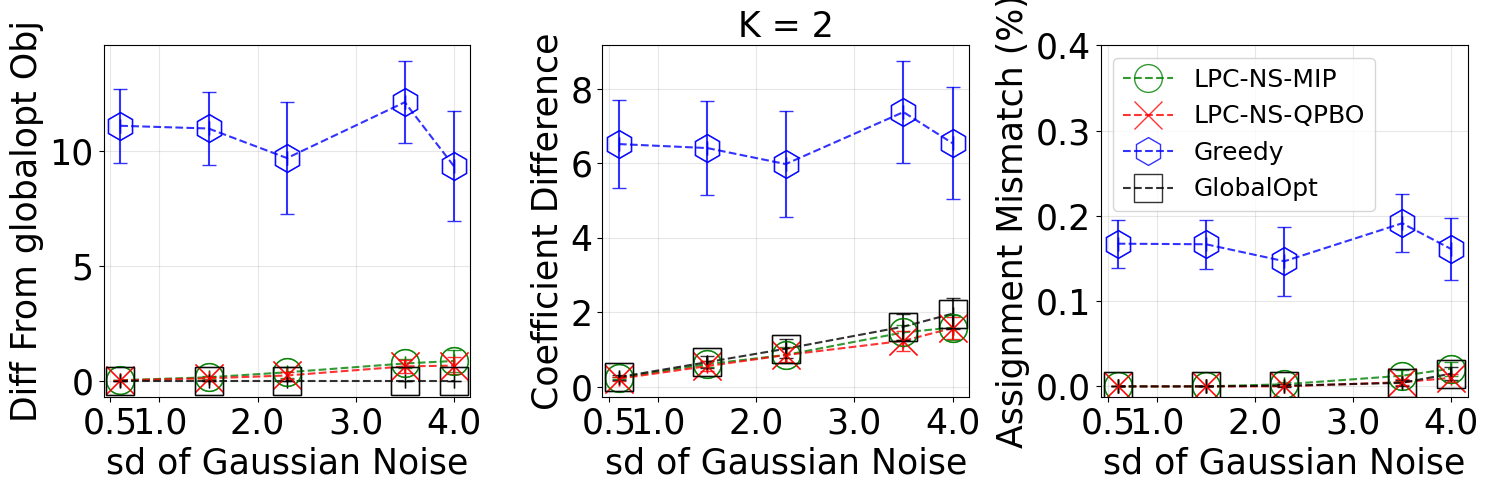

In [6]:
parameter = 'noise_std'

dir = 'noise_std/N=200_K=2_D=3_outlier_ratio=0.0_validation=True_use_exist=False_SelfDefinedX_SelfDefinedSlope'
ranges =[0.6, 1.5, 2.3, 3, 3.5, 4]
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', 
                                          optimal_folder_path=f'experiments/results/globalopt/{dir}')
lpc_ns_qpbo = Utils.load_evaluation_result(f'experiments/results/lpc_ns_qpbo/{dir}', 
                                           optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}',
                                          optimal_folder_path=f'experiments/results/globalopt/{dir}')

fig, axes = Visualization.plot_evaluation_line_plot(parameter, 
                                                lpc_ns_mip = lpc_ns_mip[0], 
                                                lpc_ns_qpbo = lpc_ns_qpbo[0], 
                                                globalopt = globalopt[0],
                                                x_axis = 'parameter',
                                                subset=['lpc_ns_mip_refit_milp_assignment',
                                                        'lpc_ns_qpbo_refit_milp_assignment',
                                                        'lpc_ns_qpbo_greedy',
                                                        'globalopt_milp'],
                                                        list_of_parameters=[0.6, 1, 1.5, 2.3, 3, 3.5, 4],
                                                        legend_position = 2)
axes[1].set_title('K = 2', fontsize=25)

axes[0].set_xticks([0.5, 1, 2 , 3, 4])
axes[1].set_xticks([0.5, 1, 2 , 3, 4])
axes[2].set_xticks([0.5, 1, 2 , 3, 4])
plt.tight_layout()
plt.show()

K = 3

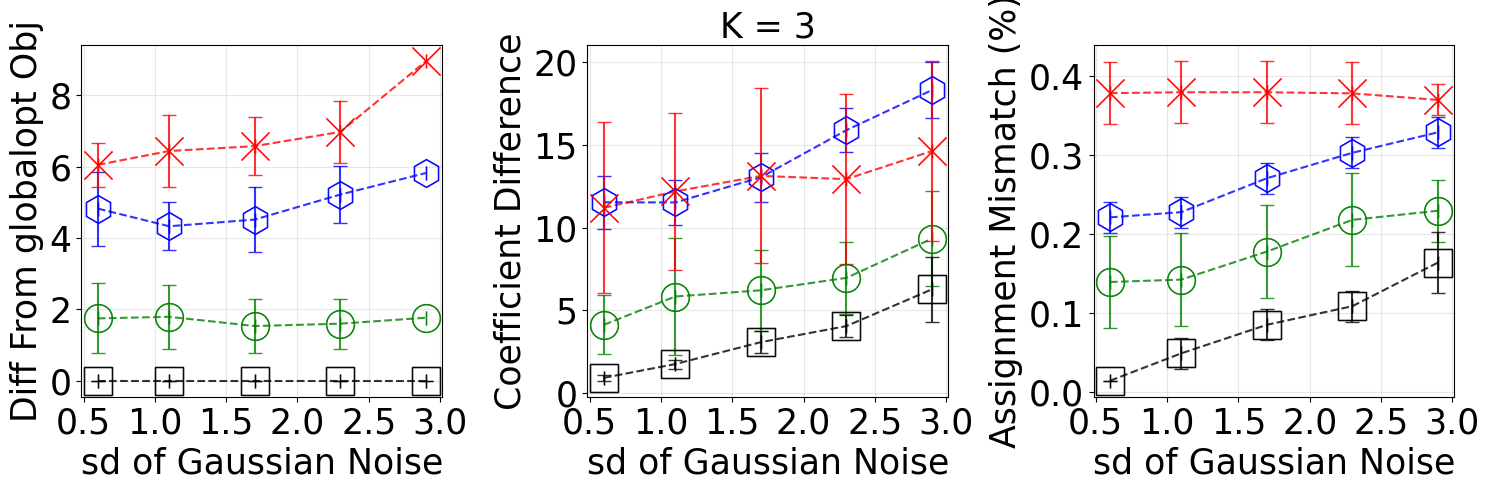

In [8]:
parameter = 'noise_std'
dir = 'N=120_K=3_D=3_outlier_ratio=0.0_validation=True_use_exist=False_SelfDefinedX_SelfDefinedSlope'
lpc_ns_mip =  Utils.load_computer_canada_result(parameter, f'experiments/results/lpc_ns_mip/noise_std/{dir}', 
                                                [0.6, 1.1, 1.7, 2.3, 2.9], 
                                                optimal_folder_path=f'experiments/results/globalopt/noise_std/{dir}')
lpc_ns_qpbo = Utils.load_computer_canada_result(parameter, f'experiments/results/lpc_ns_qpbo/noise_std/{dir}', 
                                                [0.6, 1.1, 1.7, 2.3, 2.9],
                                                optimal_folder_path=f'experiments/results/globalopt/noise_std/{dir}')
globalopt = Utils.load_computer_canada_result(parameter, f'experiments/results/globalopt/noise_std/{dir}',
                                               [0.6, 1.1, 1.7, 2.3, 2.9], 
                                               optimal_folder_path=f'experiments/results/globalopt/noise_std/{dir}')


fig, axes = Visualization.plot_evaluation_line_plot(parameter, 
                                                lpc_ns_mip = lpc_ns_mip[0], 
                                                lpc_ns_qpbo = lpc_ns_qpbo[0], 
                                                globalopt = globalopt[0],
                                                x_axis = 'parameter',
                                                subset=['lpc_ns_mip_refit_milp_assignment',
                                                        'lpc_ns_qpbo_refit_milp_assignment',
                                                        'lpc_ns_mip_greedy',
                                                        'globalopt_milp'],
                                                        legend=False,
                                                list_of_parameters=[0.6, 1.1, 1.7, 2.3, 2.9])
axes[1].set_title('K = 3', fontsize=25)
axes[0].set_xticks([0.5, 1, 1.5, 2, 2.5, 3])
axes[1].set_xticks([0.5, 1, 1.5, 2, 2.5, 3])   
axes[2].set_xticks([0.5, 1, 1.5, 2, 2.5, 3])
plt.tight_layout()
plt.show()

### Varying number of feature variables

(k = 2)

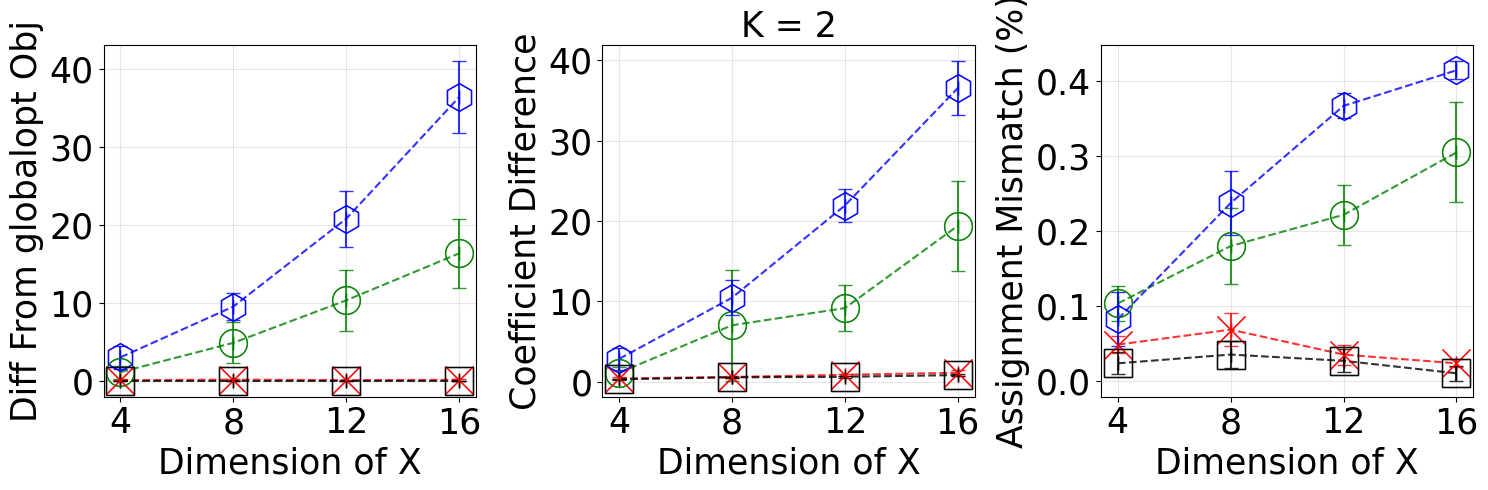

In [9]:
parameter = 'D'
ranges = [4, 8, 12, 16, 20]
dir = 'D/N=100_K=2_noise_std=0.5_outlier_ratio=0.0_validation=True_use_exist=False_SelfDefinedX_SelfDefinedSlope'
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
lpc_ns_qpbo = Utils.load_evaluation_result(f'experiments/results/lpc_ns_qpbo/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')

fig, axes = Visualization.plot_evaluation_line_plot(parameter, 
                                                lpc_ns_mip = lpc_ns_mip[0], 
                                                lpc_ns_qpbo = lpc_ns_qpbo[0], 
                                                globalopt = globalopt[0],
                                                x_axis = 'p',
                                                subset=['lpc_ns_mip_refit_milp_assignment',
                                                        'lpc_ns_qpbo_refit_milp_assignment',
                                                        'lpc_ns_qpbo_greedy',
                                                        'globalopt_milp'],
                                                        list_of_parameters= [4, 8, 12, 16,20],
                                                        legend=False)
    
axes[1].set_title('K = 2', fontsize=25)
plt.tight_layout()
plt.show()

(k = 3)

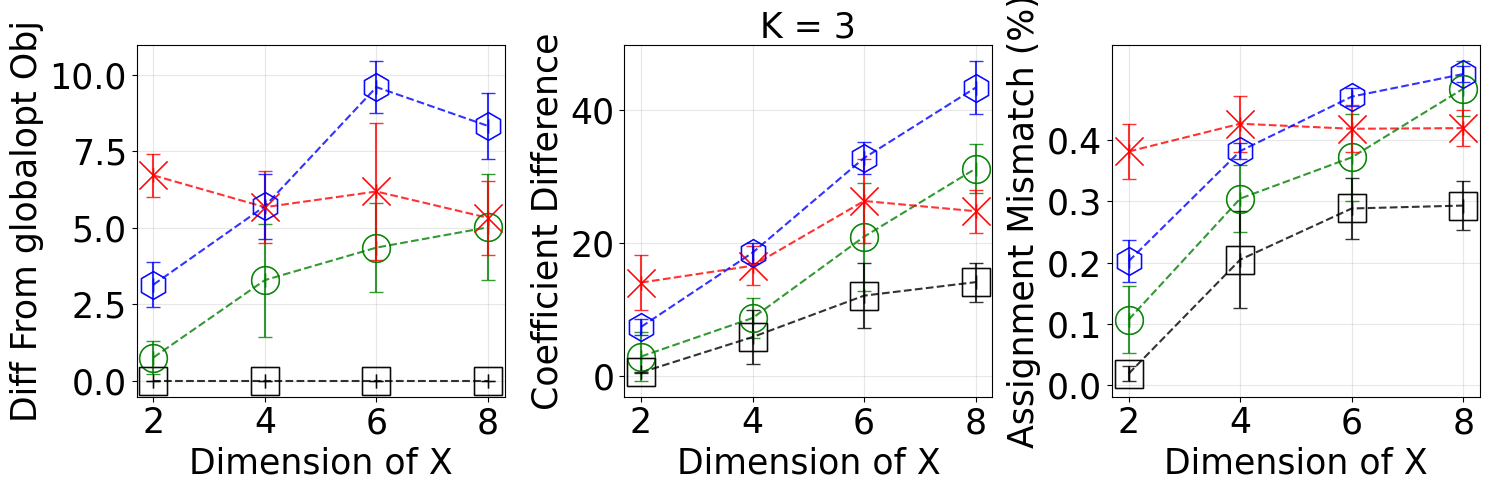

In [10]:
parameter = 'D'
ranges = [2,4,6,8]
dir = 'D/N=42_K=3_noise_std=0.5_outlier_ratio=0.0_validation=False_use_exist=False_SelfDefinedX_SelfDefinedSlope'
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
lpc_ns_qpbo = Utils.load_evaluation_result(f'experiments/results/lpc_ns_qpbo/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')

fig, axes = Visualization.plot_evaluation_line_plot(parameter, 
                                                lpc_ns_mip = lpc_ns_mip[0], 
                                                lpc_ns_qpbo = lpc_ns_qpbo[0], 
                                                globalopt = globalopt[0],
                                                x_axis = 'p',
                                                subset=['lpc_ns_mip_refit_milp_assignment',
                                                        'lpc_ns_qpbo_refit_milp_assignment',
                                                        'lpc_ns_qpbo_greedy',
                                                        'globalopt_milp'],
                                                        list_of_parameters= [2, 4, 6, 8],
                                                        legend=False)
axes[1].set_title('K = 3', fontsize=25)
plt.tight_layout()
plt.show()

### Varying proportion of outliers in target variable

(k = 2)

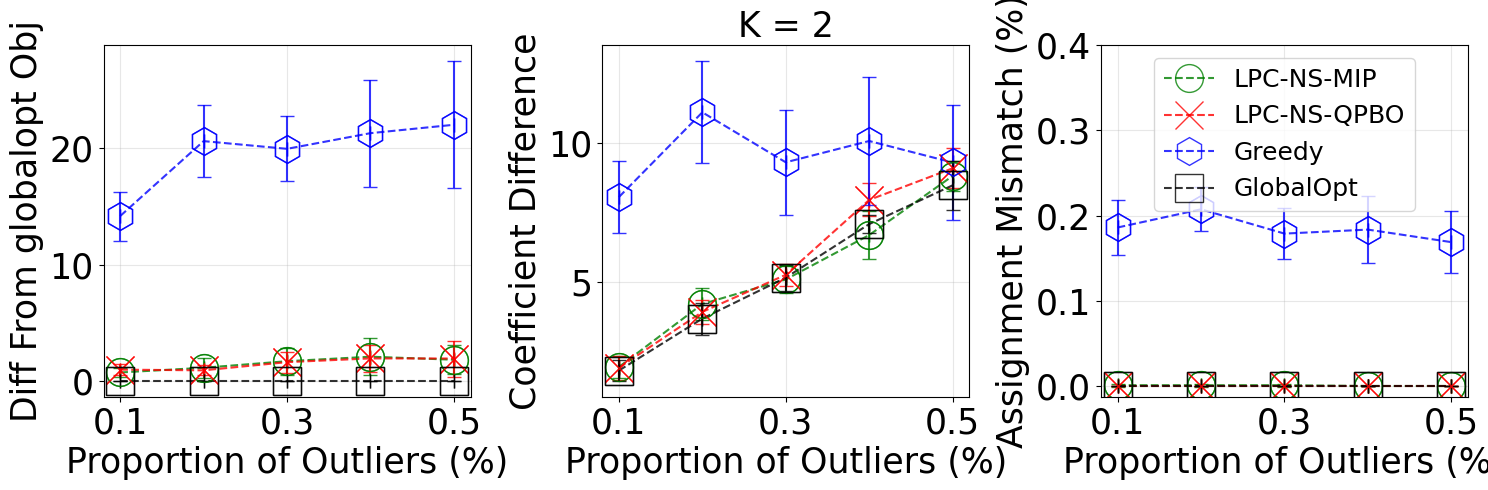

In [11]:
parameter = 'outlier_ratio'
dir = 'outlier_ratio/N=200_K=2_D=3_noise_std=0.3_validation=True_use_exist=False_SelfDefinedX_SelfDefinedSlope'
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
lpc_ns_qpbo = Utils.load_evaluation_result(f'experiments/results/lpc_ns_qpbo/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')



fig, axes = Visualization.plot_evaluation_line_plot(parameter, 
                                                lpc_ns_mip = lpc_ns_mip[0], 
                                                lpc_ns_qpbo = lpc_ns_qpbo[0], 
                                                globalopt = globalopt[0],
                                                x_axis = 'parameter',
                                                subset=['lpc_ns_mip_refit_milp_assignment',
                                                        'lpc_ns_qpbo_refit_milp_assignment',
                                                        'lpc_ns_qpbo_greedy',
                                                        'globalopt_milp'
                                                        ],
                                                        list_of_parameters=[0.1, 0.2, 0.3, 0.4, 0.5],
                                                        legend_position=2)
                                                        
axes[1].set_title('K = 2', fontsize=25)
plt.tight_layout()
plt.show()

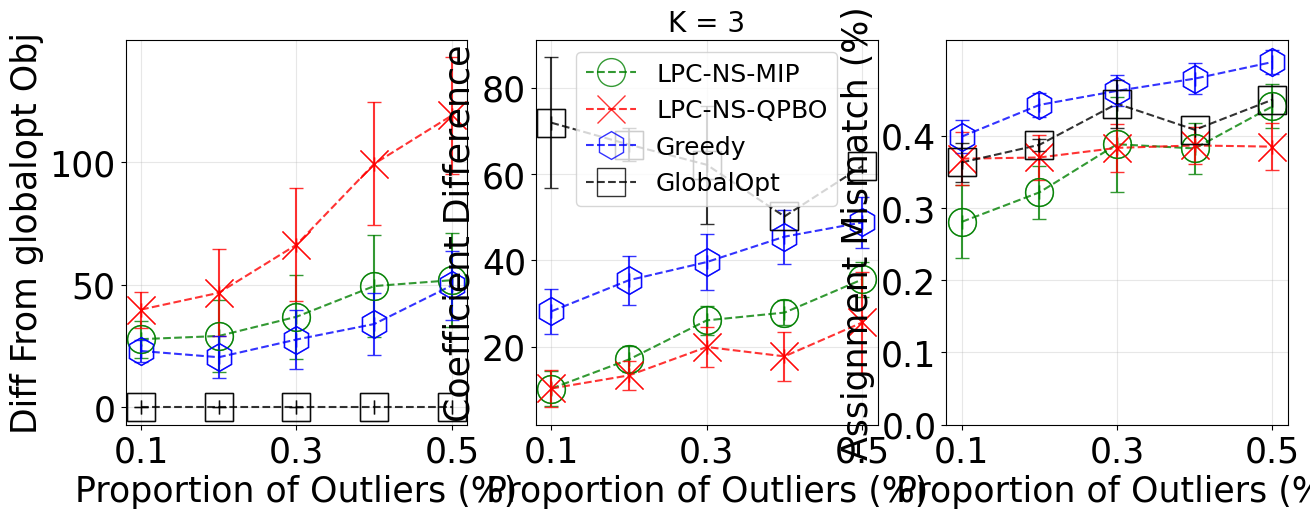

In [12]:
parameter = 'outlier_ratio'
dir = 'outlier_ratio/N=120_K=3_D=3_noise_std=2.5_validation=False_use_exist=False_SelfDefinedX_SelfDefinedSlope'
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
lpc_ns_qpbo = Utils.load_evaluation_result(f'experiments/results/lpc_ns_qpbo/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')



fig, axes = Visualization.plot_evaluation_line_plot(parameter, 
                                                lpc_ns_mip = lpc_ns_mip[0], 
                                                lpc_ns_qpbo = lpc_ns_qpbo[0], 
                                                globalopt = globalopt[0],
                                                x_axis = 'parameter',
                                                subset=['lpc_ns_mip_refit_milp_assignment',
                                                        'lpc_ns_qpbo_refit_milp_assignment',
                                                        'lpc_ns_qpbo_greedy',
                                                        'globalopt_milp'
                                                        ])
axes[1].set_title('K = 3', fontsize=20)
plt.show()

## RQ3: Performance Analysis and Algorithm Properties on Real-World Datasets

In [ ]:
import json
import os

data_list = [
(368, 'Type'),
 (519, 'sex'),
 (60, 'selector'),
 (1, 'Sex'),
 (87, 'motor'),
 (275, 'hr'),
 (320, 'Fjob'),
 (597, 'day'),
 (390, 'period'),
 (925, 'Age'),
 (189, 'sex'),
(89, 'largest spot size')]


df = pd.DataFrame()
cluster_mismatch_df = pd.DataFrame()
weight_mismatch_df = pd.DataFrame()
data_info_df = pd.DataFrame()
for tem in data_list:
    path = f'real_data/cleaned_data_collection/Data_{tem[0]}_{tem[1]}.json'
    data = json.load(open(path))
    X = np.array(data['X'])
    z = np.array(data['z'])
    x1 = X[np.where(z == 0)]
    x2 = X[np.where(z == 1)]
    XTX = ((X.T @ X)/2)
    x1tx1 = np.linalg.norm((XTX - x1.T @ x1), ord=2)
    x2tx2 = np.linalg.norm((XTX - x2.T @ x2), ord=2)
    sum = (x1tx1 + x2tx2)/X.shape[0]
    sum = sum 
    best_greedy = 1e10
    best_mip = 1e10
    best_qpbo = 1e10
    for lambda_reg in [10, 0.1, 0.001]:
        if os.path.exists(f'experiments/results/real_datalpc_ns_qpbo/{tem[0]}_{tem[1]}_{lambda_reg}/evaluation_results.json'):
            qpbo = json.load(open(f'experiments/results/real_datalpc_ns_qpbo/{tem[0]}_{tem[1]}_{lambda_reg}/evaluation_results.json'))
            mse_qpbo = qpbo['mse_refit_milp_assignment']  * X.shape[0] #sse
        else:
            mse_qpbo = np.nan
        if os.path.exists(f'experiments/results/real_data/lpc_ns_mip/{tem[0]}_{tem[1]}_{lambda_reg}/evaluation_results.json'):
            mip = json.load(open(f'experiments/results/real_data/lpc_ns_mip/{tem[0]}_{tem[1]}_{lambda_reg}/evaluation_results.json'))
            mse_mip = mip['mse_refit_milp_assignment'] * X.shape[0] # sse
        else:
            mse_mip = np.nan
        if os.path.exists(f'experiments/results/real_data/greedy/{tem[0]}_{tem[1]}_{lambda_reg}/evaluation_results.json'):
            greedy = json.load(open(f'experiments/results/real_data/greedy/{tem[0]}_{tem[1]}_{lambda_reg}/evaluation_results.json'))
            mse_greedy = greedy['mse_greedy']
            mse_sem_greedy = greedy['mse_greedy_sem'] * 1.96
        else:
            mse_greedy = np.nan
            mse_sem_greedy = np.nan
        if mse_greedy == np.nan and mse_mip == np.nan and mse_qpbo == np.nan:
            continue
        else:
            if best_greedy > mse_greedy:
                best_greedy = mse_greedy
            if best_mip > mse_mip:
                best_mip = mse_mip
            if best_qpbo > mse_qpbo:
                best_qpbo = mse_qpbo
                
    tem_df = pd.DataFrame({'qpbo': [best_qpbo], 'mip': [best_mip], 'greedy': [best_greedy], 'sem': [mse_sem_greedy], 'name': [tem], 'sep': [sum]})
    df = pd.concat([df, tem_df])
df.sort_values(by='sep', ascending=True, inplace=True)
df['name'] = ['Stock Portfolio Performance (390)', 'Servo (87)','Solar Flare (89)','Productivity Prediction (597)',
               'Heart Failure Prediction (519)','Age of Abalone (1)','Total Rental Bike (275)','Liver Disorders (60)',
               'Student Performance (320)','Parkinsons Telemonitoring (189)','Facebook Metrics (368)',
               'Infrared Thermography (925)']
df['greedy'] = df['greedy'].astype(str) + '±' + df['sem'].astype(str)
df.drop(columns=['sem'], inplace=True)
df

,qpbo,mip,greedy,name,sep
0,1.617980e+01,1.247447e+01,17.127877723729988±1.6503878802767888,Stock Portfolio Performance (390),1.724963e-15
0,1.248658e+01,2.530514e+00,4.043101078546532±1.1435848808746185,Servo (87),5.426530e-02
0,3.828854e+00,1.105115e+01,8.301469888976632±1.0428082472773066,Solar Flare (89),5.885319e-01
0,4.149772e+01,3.822344e+01,43.46619941870192±2.7840918170373583,Productivity Prediction (597),5.913578e-01
0,4.733165e-30,6.920308e-32,25.064384351248577±8.636113677085522,Heart Failure Prediction (519),7.684701e-01
0,8.874869e+01,6.690967e+01,61.898034235980674±2.165375567000996,Age of Abalone (1),8.517289e-01
0,5.682305e+00,3.782496e+00,3.5796738782546±0.24322386772765392,Total Rental Bike (275),9.089067e-01
0,1.083983e+02,9.490413e+01,112.09685938929066±5.491481973896244,Liver Disorders (60),9.783594e-01
0,4.881275e+00,5.655724e+00,6.889685165583143±0.45746064812940723,Student Performance (320),2.010728e+00
0,1.353372e+02,1.469704e+02,174.64225826263063±12.762252007337366,Parkinsons Telemonitoring (189),3.958242e+00


## Approximation Error Analysis in Different Type of Sample X (Table 1)

In [9]:
parameter = 'XTX'
dir = 'XTX/N=70_K=2_D=2_noise_std=2_outlier_ratio=0.0_validation=False_use_exist=False_SelfDefinedX_SelfDefinedSlope'
ranges = [0, 60.4, 193.79, 666.57]
lpc_ns_mip = Utils.load_evaluation_result(f'experiments/results/lpc_ns_mip/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')
globalopt = Utils.load_evaluation_result(f'experiments/results/globalopt/{dir}', optimal_folder_path=f'experiments/results/globalopt/{dir}')

lpc_ns_mip[0][['XTX','optimal_mse_difference_refit_milp_assignment']]

,XTX,optimal_mse_difference_refit_milp_assignment
0,0.00,0.016321180896444392±0.007530659268466072
1,60.40,0.02080128610368976±0.00545895549164372
2,193.79,2.708081911771995±0.4973886710622795
3,666.57,2.6250935186127915±0.4868903794849987


In [8]:
lpc_ns_mip[0][['XTX','optimal_mse_difference_CLR']]

,XTX,optimal_mse_difference_CLR
0,0.00,18.486257142857145±0.44412628451673464
1,60.40,72.24812857142857±0.8360733434204384
2,193.79,9.443399999999999±0.3633189250965787
3,666.57,0.5996499999999999±0.031589331004839814
